# Module 7: Logging

### Introduction
As a programmer, you often check the status of the output of your code. Furthermore, it is often a good idea to check the status of variables at certain point in your code. In Python, this is often done with the function *print()*. While this is a good way of checking the status of variables or your output, it only exists in the environment (may it be a Python console, a terminal, an IDE or otherwise) you are working in. If you ever close the environment, the print statements are gone forever.

Sometimes, you want to store these outputs for a longer term. This is where the logging library comes in. In this module you will learn:

1. Difference between print and logging
2. The different levels of logging
3. Creating a logger 
4. Changing the format of a logger
5. How to store output of a logger in a .log file


Enjoy!

In [1]:
# Import all the packages needed for this module
import logging

# Section 1: Difference between print and logging

Let's first see how print is usually used in a simple example. 
##### ASSIGNMENT 1: loop through names and scores, and use print() to display each name and its score. 

In [2]:
scores = [100, 90, 95, 110, 75, 85]
names = ['Alice', 'Bas', 'Cedric', 'Dora', 'Eric', 'Faye']

#### ADD YOUR CODE HERE ####
for i in range(len(scores)):
    print(f'{names[i]} has a score of {scores[i]}.')


Alice has a score of 100.
Bas has a score of 90.
Cedric has a score of 95.
Dora has a score of 110.
Eric has a score of 75.
Faye has a score of 85.


Now let's try and display the same info, but then with logging. To display the information, try the following method: logging.info().

##### ASSIGNMENT 2: use logging.info() to try and display the same info as with print()

In [3]:
#### ADD YOUR CODE HERE ####
for i in range(len(scores)):
    logging.info(f'{names[i]} has a score of {scores[i]}.')

Hmm... there seems to be no output. Let's try another method: logging.warning()

##### ASSIGNMENT 3: use logging.warning() to try and display the same info as with print() 

In [4]:
#### ADD YOUR CODE HERE ####
for i in range(len(scores)):
    logging.warning(f'{names[i]} has a score of {scores[i]}.')

Bingo! We got the output we wanted, and some extra information you might not recognize immediately. For instance, every displayed sentence starts with *'WARNING'* followed by *:root:*.

At this point, logging seems like a really convoluted to display information that can also be done with print. However, in the next section it will be explained what the difference between info() and warning() is, and why that can be useful!

# Section 2: The different levels of logging

As seen in the assignments above, there are at least two ways of displaying information with logging, namely info() and warning(). But there are just two of the six different levels of logging. Below is an overview of all levels:

|   Level  | Numeric value |
|:--------:|:-------------:|
| CRITICAL | 50            |
| ERROR    | 40            |
| WARNING  | 30            |
| INFO     | 20            |
| DEBUG    | 10            |
| NOTSET   | 0             |

Let's try out all levels!

##### ASSIGNMENT 4: print the statement below on all different levels (excluding NOTSET, since it has no method coupled to it)

*Hint: use similar method calls as the one you used in previous assignments*


In [5]:
statement = 'This is the best logging tutorial ever created.'

#### ADD YOUR CODE HERE ####
logging.critical(statement)
logging.error(statement)
logging.warning(statement)
logging.info(statement)
logging.debug(statement)

CRITICAL:root:This is the best logging tutorial ever created.
ERROR:root:This is the best logging tutorial ever created.


### **Theory: why do not all levels display information as output?**

As can be seen in the assignment above, two levels of logging do not seem to display any information. This is because the default logger that is created by logging is set to only display messages that are logged on level 30 (i.e. warning) or higher (i.e error and critical).

In most cases, you also want to display info messages, or even debug messages. This is not possible with the default logger. So we need to create one on our own. Let's do that in the next section

# Section 3: Creating a logger
Until now, every logging statement has been displayed by using logging.*level*(). It is best practice however, to create your own logger.

This can be done with the getLogger() function. There are multiple parameters that can be set to a logger as well. For instance, what levels to display. This solves the issue where logging did not display the information even though we wanted it to.

Let's create a logger now!

##### ASSIGNMENT 5: create a logger called logger with logging.getLogger()

In [6]:
#### ADD YOUR CODE HERE ####
logger = logging.getLogger()

##### ASSIGNMENT 6: set the level of the logger to debug. This can be done with the setLevel() method.

In [7]:
logger.setLevel('DEBUG')

##### ASSIGNMENT 7: print another statement on all different logging levels, but now use the logger you created instead of logging.

In [8]:
statement2 = 'I bet even debug level will print this.'

#### ADD YOUR CODE HERE ####
logger.critical(statement2)
logger.error(statement2)
logger.warning(statement2)
logger.info(statement2)
logger.debug(statement2)

CRITICAL:root:I bet even debug level will print this.
ERROR:root:I bet even debug level will print this.
INFO:root:I bet even debug level will print this.
DEBUG:root:I bet even debug level will print this.


## THEORY: use logger.*method*() or logging.*method*()?

Now that you have created a logger, try running the code of Assignments 2,3 and 4 again. It should now display all the information it previously didn't. 

This is because since you've replaced a root logger. The root logger is also used by logging.*method*() itself. YOu can see this, because the name of the logger is always displayed in the output as well.

To make it less confusing, it is possible to create a logger with its own name. Let's do that now.

##### ASSIGNMENT 8: create a logger with its own name by adding the *name=* parameter in the getLogger() function and set its level to INFO.

In [9]:
logger = logging.getLogger(name='logger_name')
logger.setLevel('INFO')

##### ASSIGNMENT 9: print the statement on all different levels again.

In [10]:
statement2 = 'I bet even debug level will print this.'

#### ADD YOUR CODE HERE ####
logger.critical(statement2)
logger.error(statement2)
logger.warning(statement2)
logger.info(statement2)
logger.debug(statement2)

CRITICAL:logger_name:I bet even debug level will print this.
ERROR:logger_name:I bet even debug level will print this.
INFO:logger_name:I bet even debug level will print this.


Please notice two things in this output:
1. the name of the logger is now between colons instead of *root*.
2. since level is set to INFO, the debug output is not displayed. 

It is always best practice when creating your own logger to give it a suitable name so that is can be easily distinguished and doesn't overwrite the root logger.

# Section 4: basicConfig and Handlers of a logger
 
As you noticed by now, there is a default format in which a logger outputs information, which is:

    "%(levelname)s:%(name)s:%(message)s"  

This format is written in an ancient (i.e. Python2.7) style of string formatting, so it might be a bit hard to read, but should make sense considering you have seen the output it gives.

Furthermore, the logger we've created automatically outputs in the console (or in the case of notebooks, the cell), and not yet stored in a file. This is because the default handler that is given to a logger is the StreamHandler, which sends all output to [sys.stderr](https://en.wikipedia.org/wiki/Standard_streams#Standard_error_(stderr)) (this basically means to the terminal, console or notebook cell you are working in).

Let's now see how we can change the output format of the logger. This is done in multiple steps: 
* create a handler (we will use a SteamHandler)
* create a new format as a string
* add the format to the handler
* add the handler to the logger we created

##### ASSIGNMENT 10: create a new Streamhandler with logging.StreamHandler()

In [11]:
#### ADD YOUR CODE HERE ####
stream_handler = logging.StreamHandler()

##### ASSIGNMENT 11: create a Formatter that includes a timestamp, based on the default string mentioned above. 

*Hint: %(asctime)s can be used to add a timestamp to the format.* 

In [12]:
#### ADD YOUR CODE HERE ####
new_format = '%(asctime)s - %(levelname)s - %(name)s - %(message)s'
#### STOP ADDING YOUR CODE HERE ####

new_format = logging.Formatter(new_format)

##### ASSIGNMENT 12: Add the new format to the handler. This can be done with the setFormatter() method of a handler. 

In [13]:
#### ADD YOUR CODE HERE ####
stream_handler.setFormatter(new_format)

##### ASSIGNMENT 13: Add the handler to your logger. This can be done with the addHandler() method of a logger. 

In [14]:
del logger

In [15]:
logger = logging.getLogger(name='logger_name')
logger.setLevel('INFO')

In [16]:
logger.addHandler(stream_handler)

In [17]:
statement2 = 'I bet even debug level will print this.'

#### ADD YOUR CODE HERE ####
logger.critical(statement2)

2022-06-26 20:01:42,538 - CRITICAL - logger_name - I bet even debug level will print this.
CRITICAL:logger_name:I bet even debug level will print this.


DOUBLE OUTPUT HERE ONLY IF ROOTLOGGER IS EDITED. FIND NICE SOLUTION HERE

In [78]:
len(logger.handlers)

1

## THEORY: how to change the default format of a logger?
As you noticed by now, there is a default format in which a logger outputs information, which is:

    "%(levelname)s:%(name)s:%(message)s"  

This format is still writting in an old style of string formatting, so it might be a bit hard to read.

 Furthermore, it is stored in the basicConfig of a logger. This can but can be overwritten to change to your needs. For instance, you might want to display a timestamp with the message that was logged. Let's do that now!

##### ASSIGNMENT 10: create a new format that includes a timestamp for your logger that includes time and change the format with basicConfig.

*Hint: %(asctime)s can be used to add a timestamp to the format.* 

In [40]:
#### ADD YOUR CODE HERE ####
format = '%(asctime)s - %(levelname)s:%(name)s - %(message)s'
#### STOP ADDING CODE HERE ####

logging.basicConfig(format=format)

In [43]:
logger.warning('help')

Most likely, you cannot make any sense of the file contents. This is because pickle files are Python Objects that are serialized into a byte stream. The printed content shows the actual bytes.

When you are unsure with what kind of data object you are working with, it is often a good choice to check the data type with 'type()'. 

##### ASSIGNMENT 3: print the file type of each pickled file with type() 

In [4]:
for file in list_of_pickle_files:
    #### ADD YOUR CODE HERE ####
    with open(file, mode='rb') as pickle_file:
        print(f'The object type of contents of {file} are: {type(pickle_file.read())}')

The object type of contents of pickle_file_2.pickle are: <class 'bytes'>
The object type of contents of pickled_list.pickle are: <class 'bytes'>
The object type of contents of pickle_file_3.pickle are: <class 'bytes'>
The object type of contents of pickle_file_1.pickle are: <class 'bytes'>


### **Theory - why use pickle?**
Compared to other file types, it might be unclear at this point why we want to use pickle at all. Binary files aren't easy to read or use in general. So wouldn't it be more convenient to save data as a more generic file types such as XML, JSON or CSV?

The answer is: it depends on what type of information you want to save and/or transfer. Pickle is ment as a convenient file type to transfer **Python objects** specifically between different systems, environments or pieces of Python code. It is the fastest and most efficient way to transport practically any(!) Python object.

# Section 2: The Python *pickle* module
The *pickle* module is part of the standard library that comes with Python. As mentioned earlier, it is used to easily serialize and deserialize Python objects. Let's take a look at the most important methods the module has to offer!

BLABLA GO TO DOCUMENTATION BLABLA

For more information, please refer to the [official pickle documentation](https://docs.python.org/3/library/pickle.html)

Let's explore the functionality in code!

In [5]:
import pickle

##### ASSIGNMENT 4: create a Python object and save it as a pickle file with the dump() method.

In [6]:
#### ADD YOUR CODE HERE
a_list = ['hi', 'I', 'am', 'a', 'list']

# Then open a new file with the built-in open() function
with open('pickled_list.pickle', mode='wb') as file:
    pickle.dump(a_list, file)  # save it as a pickle file

##### ASSIGNMENT 5:  open the object you just created with load() method.

In [7]:
#### ADD YOUR CODE HERE

# Then open a new file with the built-in open() function
with open('pickled_list.pickle', mode='rb') as file:
    loaded_list = pickle.load(file)  # save it as a pickle file
print(loaded_list)

['hi', 'I', 'am', 'a', 'list']


##### ASSIGNMENT 6: load the pickle files that were already present in the folder and determine what kind of Python objects they are

In [8]:
#### ADD YOUR CODE HERE
for pickle_file in list_of_pickle_files:
    with open(pickle_file, mode='rb') as file:
        loaded_file = pickle.load(file)  # save it as a pickle file
    print(loaded_file)
    print(type(loaded_file))
    print()

[ 2  3  5  7 11 13 17 19 23]
<class 'numpy.ndarray'>

['hi', 'I', 'am', 'a', 'list']
<class 'list'>

[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31)]
<class 'list'>

{'Archimedes': 3.14, "Euler's number ": 1.71, 'Pythagoras': 1.41, 'Theodorus': 1.73, 'Apery': 1.2}
<class 'dict'>



# Section 3: speed comparison

### **Theory - speed and file size of pickle files**
As a Data Engineer, you often want the most efficient solution to the challenges that appear during your work. When working with small datasets, different approaches might seem interchangeable. However, working with larger datasets, you will notice differences in the runtime speed of code.

In this section, we will explore how fast writing and reading pickle files are when working with tabular data compared to using .csv files. The pandas libary will be used to create a large dummy dataset, save it to disk and load it again. Since the focus of this module is Pickle, there will not be in-depth info of pandas, but it is always possible to check out the [Pandas Documentation](https://pandas.pydata.org/docs/). 

Furthermore, we will use a builtin magic function of jupyter called *%%time* that will show the time it took to run a certain cell. 




##### ASSIGNMENT 7: create a dummy dataset of 5 columns and 2 million rows

In [19]:
np.random.seed = 42
df_size = 5_000_000

df = pd.DataFrame({
    'a': np.random.rand(df_size),
    'b': np.random.rand(df_size),
    'c': np.random.rand(df_size),
    'd': np.random.rand(df_size),
    'e': np.random.rand(df_size)
})

df

,a,b,c,d,e
0,0.377691,0.170632,0.718603,0.787502,0.265940
1,0.195612,0.517449,0.431774,0.433832,0.570307
2,0.354629,0.469046,0.652140,0.200311,0.158369
3,0.697143,0.609328,0.218446,0.011733,0.808165
4,0.670244,0.257029,0.261845,0.229789,0.829596
...,...,...,...,...,...
4999995,0.603542,0.754590,0.329973,0.743658,0.878265
4999996,0.281286,0.421385,0.231507,0.683640,0.915960
4999997,0.690190,0.770438,0.325157,0.744733,0.999744
4999998,0.041488,0.180944,0.009139,0.846707,0.383906


##### ASSIGNMENT 8: save the DataFrame as a .csv file using the .to_csv() function of Pandas

In [20]:
%%time
#### ADD YOUR CODE HERE ####
df.to_csv('data.csv', index=False)

CPU times: user 30.9 s, sys: 1.08 s, total: 31.9 s
Wall time: 32.3 s


##### ASSIGNMENT 9: load the created .csv file as a DataFrame using the pandas.read_csv() funcion of Pandas

In [36]:
%%time
#### ADD YOUR CODE HERE ####
df_from_csv = pd.read_csv('data.csv')

CPU times: user 2.88 s, sys: 140 ms, total: 3.02 s
Wall time: 3.02 s


##### ASSIGNMENT 10: now save the original DataFrame we created as a pickle file

In [37]:
%%time
#### ADD YOUR CODE HERE ####
with open('dataframe.pickle', mode='wb') as file:
    pickle.dump(df, file) 

CPU times: user 49.2 ms, sys: 212 ms, total: 262 ms
Wall time: 488 ms


##### ASSIGNMENT 11: now deserialize pickle file containing the serialized DataFrame into a DataFrame 

In [39]:
%%time
#### ADD YOUR CODE HERE ####
with open('dataframe.pickle', mode='rb') as file:
    deserialized_df = pickle.load(file) 

CPU times: user 3.34 ms, sys: 84.4 ms, total: 87.7 ms
Wall time: 86 ms


##### ASSIGNMENT 12: Now print the file size of both the csv file and the pickle file you created.

*Hint: the OS library has something for this called getsize()*

In [44]:
#### ADD YOUR CODE HERE ####
size_of_pickle = os.path.getsize('dataframe.pickle') / 1_000_000
size_of_csv = os.path.getsize('data.csv') / 1_000_000

print(f'The size of the pickle file is {size_of_pickle} bytes')
print(f'The size of the csv file is {size_of_csv} bytes')

The size of the pickle file is 200.000688 bytes
The size of the csv file is 481.746082 bytes


### **Theory - speed and file size of pickle files**
As you can see Pickle is way more efficient to use as a temporary storage than .csv when it comes to tabular data.
* it is much faster to read/write pickle files than csv files
* the file size is also smaller for pickle files compared to csv files

However, there are also downsides. Pickle creates files unreadable for humans, and cannot be loaded into programs like Excel. Therefore, always make sure if pickle is the right fit for the job!

# Section 4: pickle and machine learning algorithms
In this final section, we are going to save a fully trained machine learning model into a pickle file. As already stated, almost all Python objects can be stored as pickle, and this includes ML models. This is arguably the most powerful usage of Pickle for a Data Engineer when working with ML models.

Since the focus of this Module is not on the creation or training of a ML model, a cell with all code required to do this is given below. Simply run the cell to load the correct data and train a model.

The data we use is from the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), which is often used to showcase classification algorithms.

In [ ]:
# Extra libraries needed for this section
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### ASSIGNMENT 13: run the following few cells to load and explore the data, and subsequently train a model.

In [59]:
# load data from sklearn
iris = datasets.load_iris()

# turn data into DataFrame
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

# Add species column
df_iris['species'] = df_iris['target'].map({
    0:'setosa',
    1:'versicolor',
    2: 'virginica'
})

# Show top rows of DataFrame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


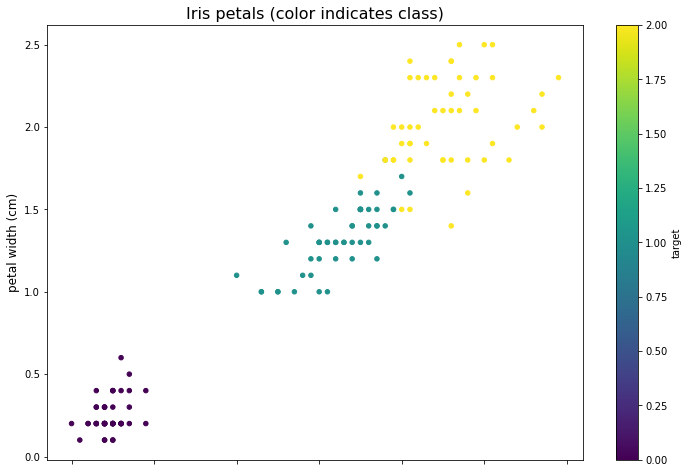

In [100]:
# Plot the petal length and petal width
df_iris.plot.scatter(
    x='petal length (cm)',
    y='petal width (cm)',
    c='target',
    colormap='viridis',
    figsize=(12,8))

plt.xlabel("petal length (cm)", size=12)
plt.ylabel("petal width (cm)", size=12)
plt.title('Iris petals (color indicates class)', size=16);


In [123]:
# PARAMETERS TO CHANGE
input_columns = ['petal length (cm)','petal width (cm)']
test_size = 0.5
random_state = 42
model = LogisticRegression()
model_name = 'LR_with_petaldata'


# Create input X, and target y to train the model with 
X = df_iris[input_columns]  # only use petal length and width
X = X.to_numpy()  # converting into numpy array
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

# Fit the model based on chosen parameters
model.fit(X,y)

LogisticRegression()

##### ASSIGNMENT 14: save the fitted model as a pickle file

In [124]:
#### ADD YOUR CODE HERE ####
path_to_savefile = model_name + '.pickle'

with open(path_to_savefile, mode='wb') as file:
    pickle.dump(model, file)  # save it as a pickle file

##### ASSIGNMENT 15: load the fitted model and print metrics

In [127]:
#### ADD YOUR CODE HERE ####
path_to_model = 'LR_with_petaldata.pickle'
with open(path_to_model, mode='rb') as file:
    loaded_model = pickle.load(file)  # save it as a pickle file

training_prediction = loaded_model.predict(X_train)
test_prediction = loaded_model.predict(X_test)
#### STOP ADDING YOUR CODE HERE ####


# Precision Recall scores
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print('Confuson matrix')
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.923     0.889     0.906        27
           2      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

Confuson matrix
[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


##### (OPTIONAL) ASSIGNMENT 16
* fit another Logistic Regression model with diffent input columns (sepal data instead of petal)
* save the model under a different name
* load both models and compare metrics (doublecheck you are using the right X_train and X_test for each model when predicting)

Which model performs better?

In [130]:
# PARAMETERS TO CHANGE
input_columns = ['sepal length (cm)','sepal width (cm)']
test_size = 0.5
random_state = 42
model = LogisticRegression()
model_name = 'LR_with_sepaldata'


# Create input X, and target y to train the model with 
X = df_iris[input_columns]  # only use petal length and width
X = X.to_numpy()  # converting into numpy array
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

# Fit the model based on chosen parameters
model.fit(X,y)


training_prediction = model.predict(X_train)

test_prediction = model.predict(X_test)

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print('Confuson matrix')
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.750     0.778     0.764        27
           2      0.769     0.741     0.755        27

    accuracy                          0.827        75
   macro avg      0.840     0.840     0.839        75
weighted avg      0.827     0.827     0.827        75

Confuson matrix
[[21  0  0]
 [ 0 21  6]
 [ 0  7 20]]


## **THEORY - Pickle for Machine Learning models**
As you can see, saving different models as different pickle files is done easily. This can be of great help to a Data Engineer working with ML models.

 For example, it makes model comparison all trained with different parameters more organized and efficient. 
 
 Furthermore, it can help productionalize models: train multiple models and compare them in a development environment and only transfer the pickle file of the best performing model to the production environment.